#Part 2: Pneumonia Prediction Dataset (30 Pts)

##Q1: Exploratory Data Analysis (4 Pts)
Download and explore the data. Explore label distribution and qualitatively describe the data by plotting healthy and pneumonia samples. Do you see visual differences between healthy and disease samples? Do you find sources of bias that could influence model performance? How do you preprocess the data for your further analysis?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import cv2
import torch
from torchvision import datasets, transforms
import helper
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


###Storing Filedata in Array

First, we store all the image data in numpy arrays so we can work with them more easily afterwards.


In [2]:
!git clone https://github.com/hestquest/MLHC.git
#kaggle datasets download -d fedesoriano/heart-failure-prediction

fatal: destination path 'MLHC' already exists and is not an empty directory.


In [3]:
test_normal = []
test_pneumonia = []
val_normal = []
val_pneumonia = []
train_normal = []
train_pneumonia = []

# Load in the images
for filepath in os.listdir('/content/MLHC/chest_xray/test/NORMAL'):
    test_normal.append(cv2.imread('chest_xray/test/NORMAL/{0}'.format(filepath),0)) #the 0 is for greyscale

for filepath in os.listdir('/content/MLHC/chest_xray/test/PNEUMONIA'):
    test_pneumonia.append(cv2.imread('chest_xray/test/PNEUMONIA/{0}'.format(filepath),0))
    
for filepath in os.listdir('/content/MLHC/chest_xray/val/NORMAL'):
    val_normal.append(cv2.imread('chest_xray/val/NORMAL/{0}'.format(filepath),0))
    
for filepath in os.listdir('/content/MLHC/chest_xray/val/PNEUMONIA'):
    val_pneumonia.append(cv2.imread('chest_xray/val/PNEUMONIA/{0}'.format(filepath),0))

for filepath in os.listdir('/content/MLHC/chest_xray/train/NORMAL'):
    train_normal.append(cv2.imread('/content/MLHC/chest_xray/train/NORMAL/{0}'.format(filepath),0))

for filepath in os.listdir('/content/MLHC/chest_xray/train/PNEUMONIA'):
    train_pneumonia.append(cv2.imread('/content/MLHC/chest_xray/train/PNEUMONIA/{0}'.format(filepath),0))



First we plot a small selection of images to check if we can see differences between the healthy samples and the samples with Pneumonia.


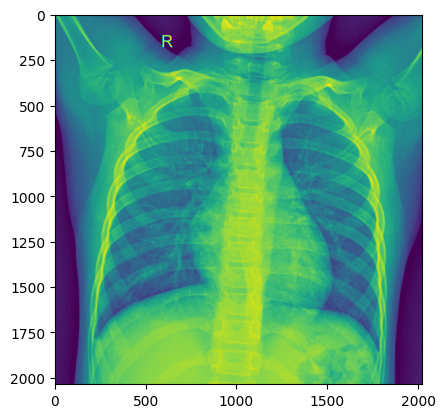

In [4]:
plt.imshow(train_normal[0])


###Plotting Image Selection

First we plot a small selection of images to check if we can see differences between the healthy samples and the samples with Pneumonia.


In [5]:
train_normal_selection = []
train_pneumonia_selection = []

for i in range(5):
    train_normal_selection.append('/content/MLHC/chest_xray/train/NORMAL/{0}'.format(os.listdir('/content/MLHC/chest_xray/train/NORMAL/')[i]))
    train_pneumonia_selection.append('/content/MLHC/chest_xray/train/PNEUMONIA/{0}'.format(os.listdir('/content/MLHC/chest_xray/train/PNEUMONIA/')[i]))

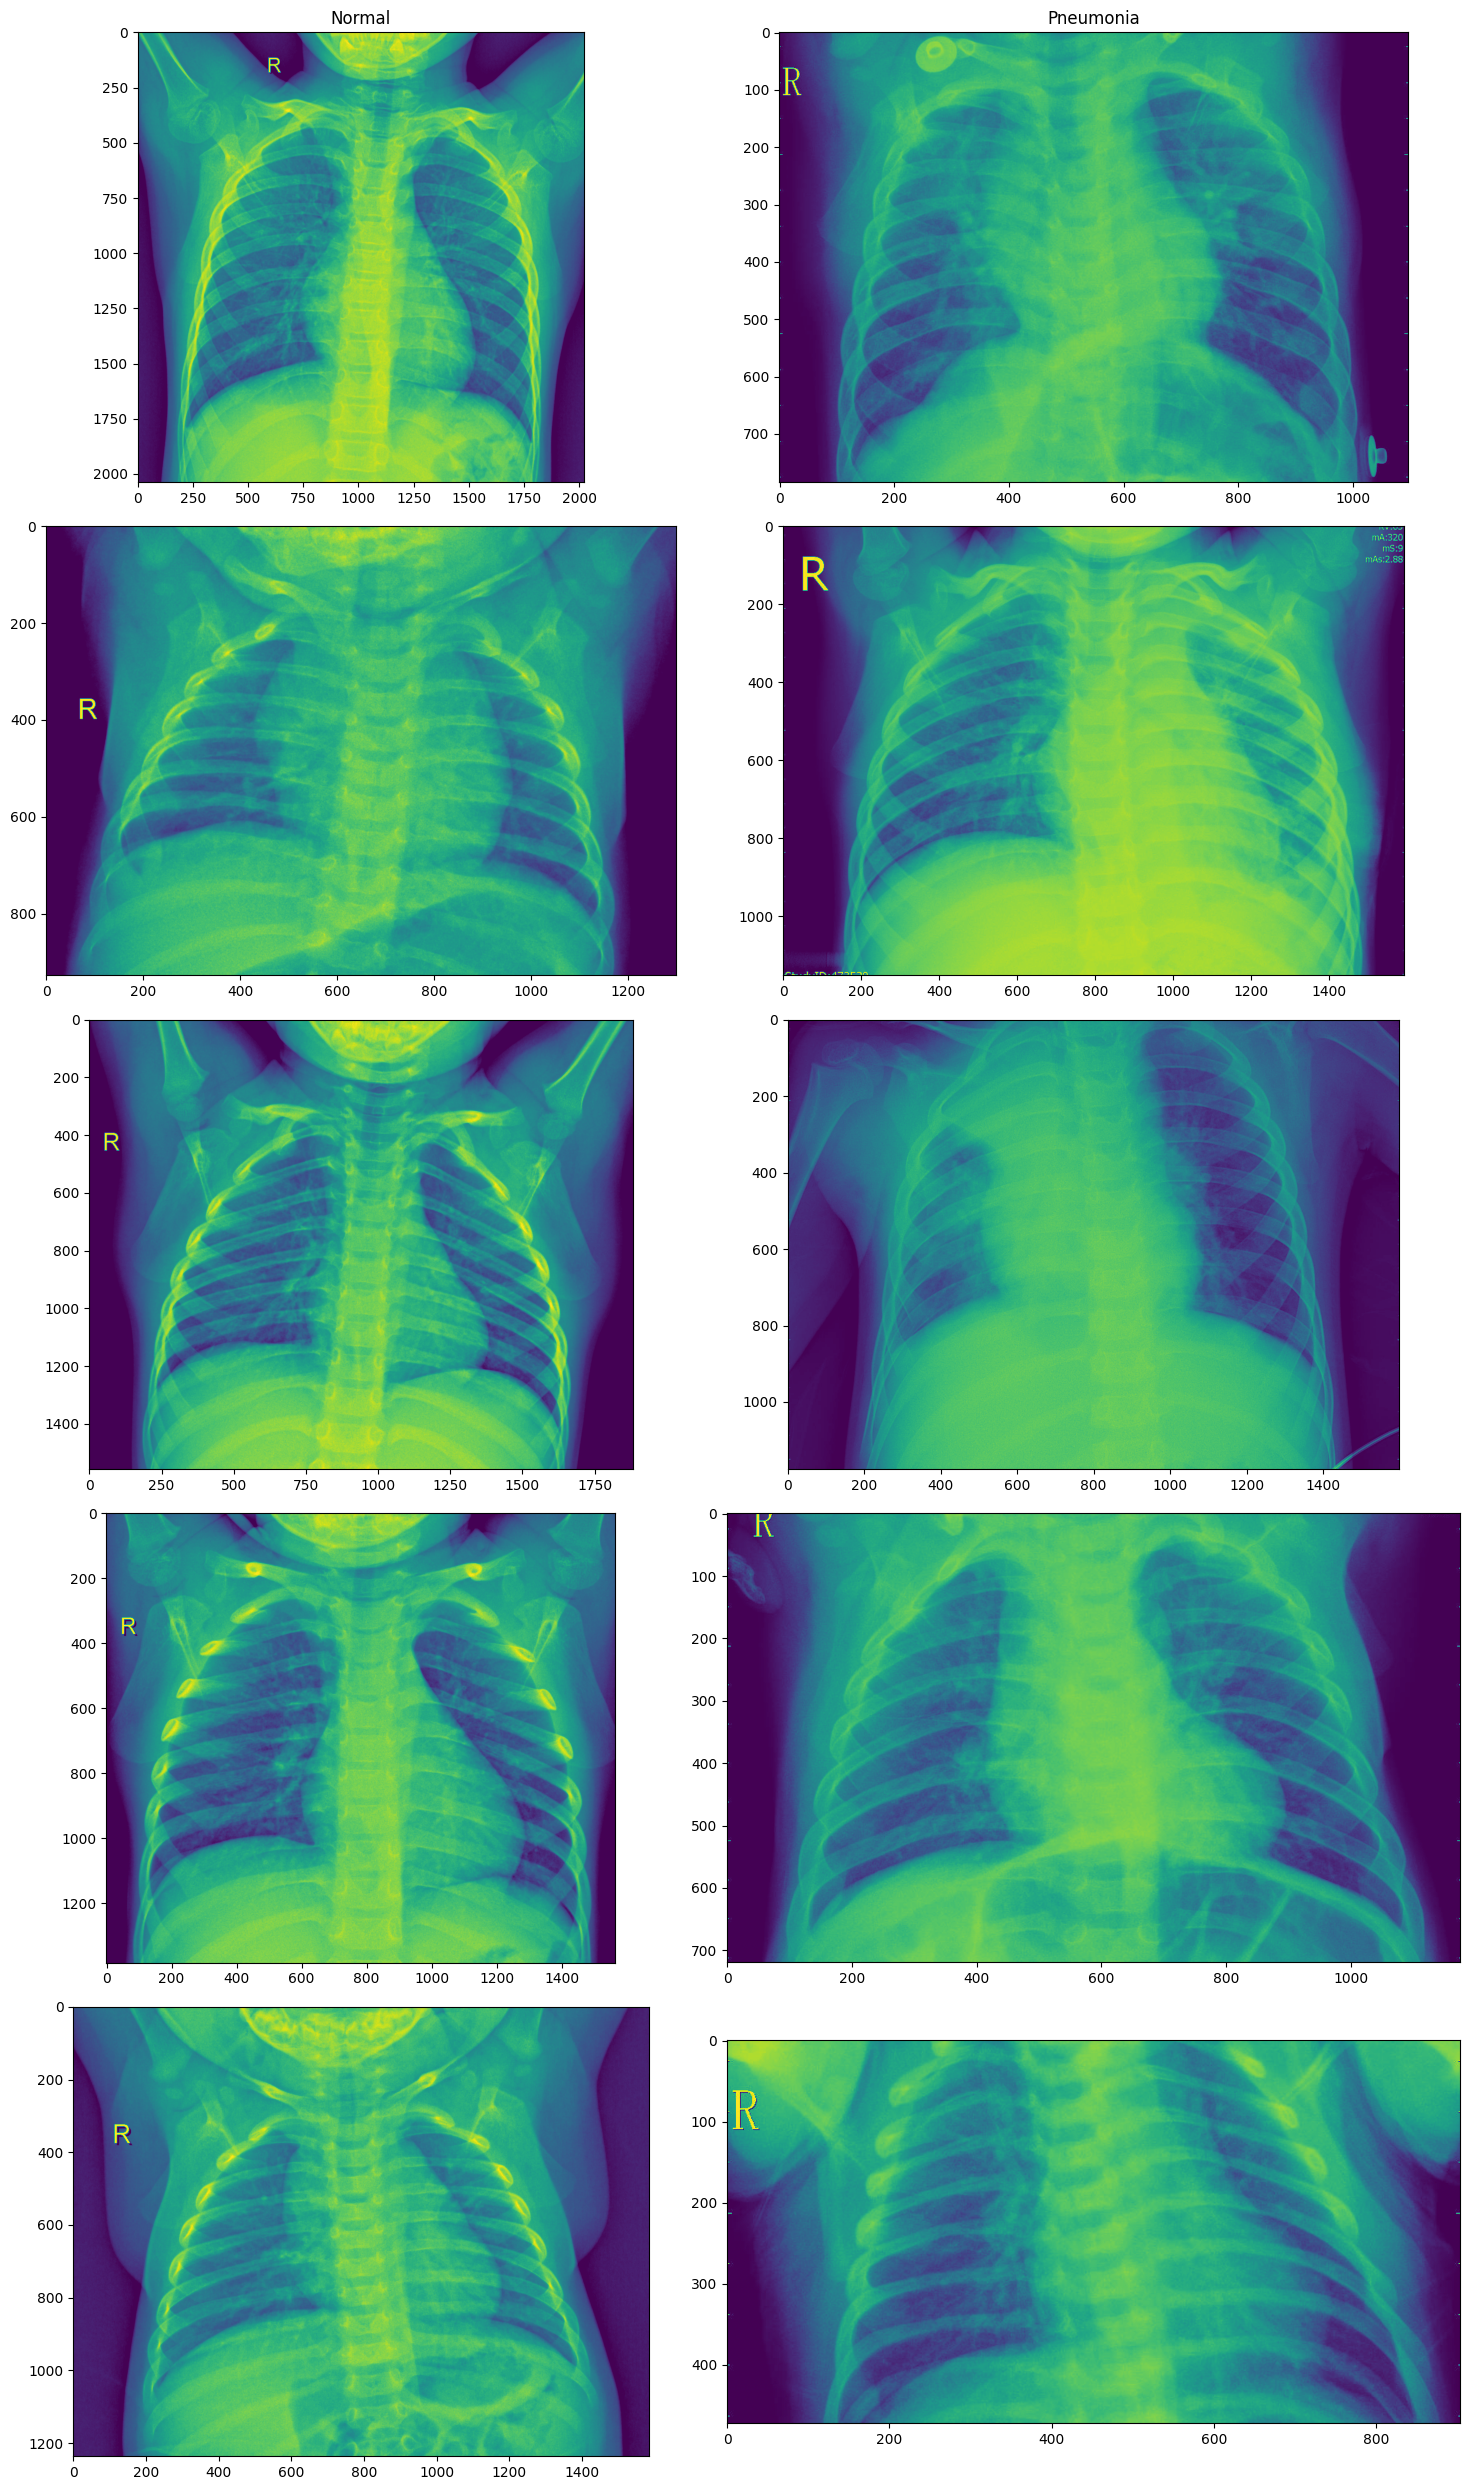

In [6]:
Cols = ['Normal', 'Pneumonia']

fig, axs = plt.subplots(5,2, figsize=(15, 25))

for i, image in enumerate(train_normal_selection):
    pic = plt.imread(image)
    axs[i,0].imshow(pic)
    axs[i,0].set()

for i, image in enumerate(train_pneumonia_selection):
    pic = plt.imread(image)
    axs[i,1].imshow(pic)
    axs[i,1].set()
    
for ax, col in zip(axs[0], Cols):
    ax.set_title(col)
    
fig.tight_layout()



When we plot the first 5 X-ray images of the training set for healthy patients (NORMAL in the left column) and patients with Pneumonia ( PNEUMONIA in the right column) we can see that the X-ray images of the patients with Pneumonia show a more cloudy texture in the area of the Lung.

We can also see that the pictures have different dimensions. That is an image property that has to be standardized before working with the images.



###Plotting Label Distribution

Now we check how the labels are distributed in the dataset and if preprocessing is necessary.


Text(0.06, 0.5, 'Number of Samples')

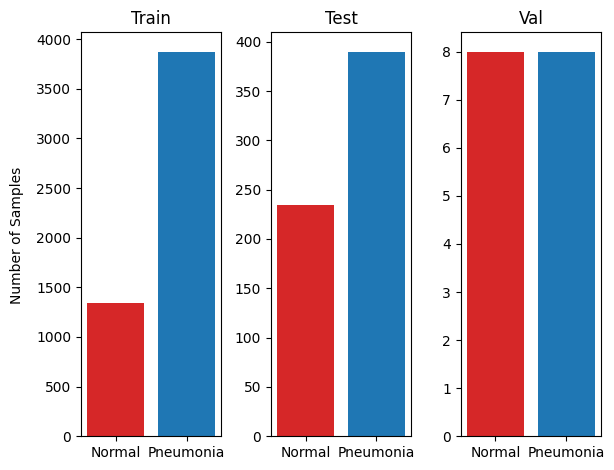

In [7]:
X = ['Normal','Pneumonia']
Train = [len(train_normal), len(train_pneumonia)]
Test = [len(test_normal), len(test_pneumonia)]
Val = [len(val_normal), len(val_pneumonia)]

fig, axs = plt.subplots(1, 3)
axs[0].bar(X, Train, color = ['tab:red', 'tab:blue'])
axs[0].set_title('Train')
axs[1].bar(X, Test, color = ['tab:red', 'tab:blue'])
axs[1].set_title('Test')
axs[2].bar(X, Val, color = ['tab:red', 'tab:blue'])
axs[2].set_title('Val')


fig.tight_layout()
plt.subplots_adjust(left  = 0.16)
fig.text(0.06, 0.5, 'Number of Samples', ha='center', va='center', rotation='vertical')



When we plot the number of samples in the dataset we can see, that the training and the test data is very unbalanced. There are more Pneumonia samples than Healthy samples in both, the train and test dataset. This is another thing we have to consider during the preprocessing steps.



###Preprocessing of Dataset

During the visualization step we found sources of bias. The images do not have the same dimensions and the label distribution is unbalanced. So now we have to preprocess the dataset.


###Building Keras Pipeline

In [8]:
batch_size = 32


image_generator = ImageDataGenerator(rescale = 1./255, shear_range = 0.1, zoom_range = 0.1)

test_generator = ImageDataGenerator(rescale = 1./255)

train_data = image_generator.flow_from_directory('/content/MLHC/chest_xray/train', 
                                                 class_mode='binary', 
                                                 batch_size = batch_size, 
                                                 classes = ['NORMAL', 'PNEUMONIA'], 
                                                 color_mode = 'grayscale', 
                                                 shuffle=False, 
                                                 target_size=(256, 256))

val_data = test_generator.flow_from_directory('/content/MLHC/chest_xray/val', 
                                              class_mode='binary', 
                                              batch_size = batch_size, 
                                              classes = ['NORMAL', 'PNEUMONIA'], 
                                              color_mode = 'grayscale', 
                                              shuffle=False, 
                                              target_size=(256, 256))

test_data = test_generator.flow_from_directory('/content/MLHC/chest_xray/test', 
                                               class_mode='binary', 
                                               batch_size = batch_size, 
                                               classes = ['NORMAL', 'PNEUMONIA'], 
                                               color_mode = 'grayscale', 
                                               shuffle=False, 
                                               target_size=(256, 256))



Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [9]:
class_names = train_data.classes
print(class_names)
for image_batch, labels_batch in train_data:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

[0 0 0 ... 1 1 1]
(32, 256, 256, 1)
(32,)


##Q2: CNN Classifier (4 Pts)
In Q3 and Q4, we aim to use post-hoc explainability methods for visualizing the parts of the image that are important for the prediction of a model. Thus, design a small CNN classifier for the dataset and report its performance on a test set. Make sure to elaborate on your architecture and training details.

In [10]:
new_model = tf.keras.models.load_model('/content/MLHC/my_model.h5')

In [11]:
results = new_model.evaluate(test_data, batch_size=32)

20/20 [==============================] - 8s 364ms/step - loss: 0.3920 - accuracy: 0.8654 - auc: 0.9381


In [12]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 8)       80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0

##Q3: Integrated Gradients (4 Pts)
Like MLPs, CNNs perform very well in tasks like classification but lack interpretability due to their black-box nature. Again, post-hoc explainability methods are thus suitable alternatives. One class of post-hoc procedures specific to image data are methods generating attribution maps, which try to highlight the most important regions on which the CNN bases its predictions. For this part of the assignment, implement the integrated gradient method. Visualize attribution maps of five healthy and five disease test samples. Do the maps highlight sensible regions? Are attributions consistent across samples? Do they match potential observations from Q1?

Baseline is usually a black image

#Testing(Trash)

In [ ]:
from tf_explain.callbacks.integrated_gradients import IntegratedGradientsCallback

callbacks = [
    IntegratedGradientsCallback(
        validation_data=(X_val, y_val),
        class_index=0,
        n_steps=20,
        output_dir=output_dir,
    )
]

new_model.fit(X_train, y_train, batch_size=2, epochs=2, callbacks=callbacks)

In [30]:
# Import the required packages
import torch
import torchvision.transforms as transforms
from captum.attr import IntegratedGradients


# Define the transform to apply to input images
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the input image and apply the transform
input_image = Image.open('/content/MLHC/chest_xray/train/NORMAL/IM-0115-0001.jpeg').convert('L')
input_tensor = transform(input_image).unsqueeze(0)

# Create an instance of the IntegratedGradients class
ig = IntegratedGradients(new_model)

# Generate the attribution map for the input image
attr_map = ig.attribute()

# Plot the attribution map
plt.imshow(attr_map.squeeze().numpy(), cmap='gray')
plt.axis('off')
plt.show()

AttributeError: ignored

In [25]:
!pip install captum
import captum
from captum.attr import IntegratedGradients
num_in = 40
input = torch.arange(0.0, num_in * 1.0, requires_grad=True).unsqueeze(0)

# attribution score will be computed with respect to target class
target_class_index = 5

# applying integrated gradients on the SoftmaxModel and input data point
ig = IntegratedGradients(new_model)
attributions, approximation_error = ig.attribute(input, target=target_class_index,
                                    return_convergence_delta=True)

# The input and returned corresponding attribution have the
# same shape and dimensionality.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


AttributeError: ignored

In [16]:
#https://www.tensorflow.org/tutorials/interpretability/integrated_gradients
baseline = tf.zeros(shape=(256,256,3))
m_steps=50
alphas = tf.linspace(start=0.0, stop=1.0, num=m_steps+1) # Generate m_steps intervals for integral_approximation() below.
def interpolate_images(baseline,
                       image,
                       alphas):
  alphas_x = alphas[:, tf.newaxis, tf.newaxis, tf.newaxis]
  baseline_x = tf.expand_dims(baseline, axis=0)
  input_x = tf.expand_dims(image, axis=0)
  delta = input_x - baseline_x
  images = baseline_x +  alphas_x * delta
  return images
def integrated_gradients(baseline,
                         image,
                         target_class_idx,
                         m_steps=50,
                         batch_size=32):
  # Generate alphas.
  alphas = tf.linspace(start=0.0, stop=1.0, num=m_steps+1)

  # Collect gradients.    
  gradient_batches = []

  # Iterate alphas range and batch computation for speed, memory efficiency, and scaling to larger m_steps.
  for alpha in tf.range(0, len(alphas), batch_size):
    from_ = alpha
    to = tf.minimum(from_ + batch_size, len(alphas))
    alpha_batch = alphas[from_:to]

    gradient_batch = one_batch(baseline, image, alpha_batch, target_class_idx)
    gradient_batches.append(gradient_batch)

  # Concatenate path gradients together row-wise into single tensor.
  total_gradients = tf.concat(gradient_batches, axis=0)

  # Integral approximation through averaging gradients.
  avg_gradients = integral_approximation(gradients=total_gradients)

  # Scale integrated gradients with respect to input.
  integrated_gradients = (image - baseline) * avg_gradients

  return integrated_gradients

interpolated_images = interpolate_images(
    baseline=baseline,
    image=img_name_tensors['Fireboat'],
    alphas=alphas)


In [17]:
import tensorflow as tf
import numpy as np

def integrated_gradients(model, image, baseline=None, steps=50):
    if baseline is None:
        baseline = tf.zeros_like(image)
    else:
        baseline = tf.convert_to_tensor(baseline)

    # Scale input and compute gradients
    scaled_inputs = [baseline + (float(i) / steps) * (image - baseline) for i in range(0, steps + 1)]
    grads = []
    for scaled_input in scaled_inputs:
        scaled_input = tf.cast(scaled_input, tf.float32)
        with tf.GradientTape() as tape:
            tape.watch(scaled_input)
            predictions = model(scaled_input)
        grads.append(tape.gradient(predictions, scaled_input))

    # Compute the average gradient
    avg_grads = tf.reduce_mean(grads, axis=0)

    # Compute integrated gradients
    integrated_gradients = (image - baseline) * avg_grads

    return integrated_gradients.numpy()

In [ ]:
# Get the test data
x_test, y_test = X_test, y_test

# Get the model
model = load_model()

# Get the healthy and disease test samples
healthy_samples = x_test[y_test == 0][:5]
disease_samples = x_test[y_test == 1][:5]

# Generate attribution maps for healthy samples
for i, sample in enumerate(healthy_samples):
    attribution_map = integrated_gradients(model, sample)
    plt.subplot(5, 2, i*2+1)
    plt.imshow(sample)
    plt.axis('off')
    plt.subplot(5, 2, i*2+2)
    plt.imshow(attribution_map, cmap='jet', vmin=0, vmax=np.max(attribution_map))
    plt.axis('off')
    plt.title('Healthy')

# Generate attribution maps for disease samples
for i, sample in enumerate(disease_samples):
    attribution_map = integrated_gradients(model, sample)
    plt.subplot(5, 2, i*2+1)
    plt.imshow(sample)
    plt.axis('off')
    plt.subplot(5, 2, i*2+2)
    plt.imshow(attribution_map, cmap='jet', vmin=0, vmax=np.max(attribution_map))
    plt.axis('off')
    plt.title('Disease')

plt.show()

In [20]:
# Get the model
#model = new_model()

# Get the test data generator

test_data = test_generator.flow_from_directory('/content/MLHC/chest_xray/test', 
                                               class_mode='binary', 
                                               batch_size=batch_size, 
                                               classes=['NORMAL', 'PNEUMONIA'], 
                                               color_mode='grayscale', 
                                               shuffle=False, 
                                               target_size=(256, 256))


# Get the healthy and disease test samples
healthy_samples = []
disease_samples = []
for i in range(len(test_data)):
    batch_x, batch_y = test_data[i]
    for j in range(len(batch_x)):
        if batch_y[j] == 0 and len(healthy_samples) < 5:
            healthy_samples.append(batch_x[j])
        elif batch_y[j] == 1 and len(disease_samples) < 5:
            disease_samples.append(batch_x[j])
        if len(healthy_samples) == 5 and len(disease_samples) == 5:
            break
    if len(healthy_samples) == 5 and len(disease_samples) == 5:
        break

# Generate attribution maps for healthy samples
for i, sample in enumerate(healthy_samples):
    attribution_map = integrated_gradients(new_model, sample)
    plt.subplot(5, 2, i*2+1)
    plt.imshow(sample[...,0], cmap='gray')
    plt.axis('off')
    plt.subplot(5, 2, i*2+2)
    plt.imshow(attribution_map[...,0], cmap='jet', vmin=0, vmax=np.max(attribution_map))
    plt.axis('off')
    plt.title('Healthy')

# Generate attribution maps for disease samples
for i, sample in enumerate(disease_samples):
    attribution_map = integrated_gradients(new_model, sample)
    plt.subplot(5, 2, i*2+1)
    plt.imshow(sample[...,0], cmap='gray')
    plt.axis('off')
    plt.subplot(5, 2, i*2+2)
    plt.imshow(attribution_map[...,0], cmap='jet', vmin=0, vmax=np.max(attribution_map))
    plt.axis('off')
    plt.title('Disease')

plt.show()

Found 624 images belonging to 2 classes.


InvalidArgumentError: ignored

##Q4: Grad-CAM6 (5 Pts)
Grad-CAM is another post-hoc method that generates attribution maps. Like in Q3, implement the method and visualize attribution maps of five healthy and five disease test samples. Do the maps highlight sensible regions? Are attributions consistent across samples? Compare your findings with Q3.

In [35]:
!pip install pytorch_grad_cam
#import pytorch_grad_cam
from pytorch_grad_cam import GradCAM

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pytorch_grad_cam (from versions: none)
ERROR: No matching distribution found for pytorch_grad_cam


ModuleNotFoundError: ignored